# Avacado Project (Evaluation Project -2)

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Downlaod Files:
    
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [1]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC


# Importing Dataset

In [3]:

df = pd.read_csv("avocado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
df.head()


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [6]:
# Omitting index column

ndf=df.iloc[:,1:]     
ndf


Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [7]:
#checking shape
ndf.shape

(18249, 13)

Dataset has 18249 rows and 13 columns.

In [8]:
# checking columns 

ndf.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
# Checking data types
ndf.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

This dataset consist of both categorical and numerical data.

 In this dataset Date is in dd-mm-yyyy format. we Need to convert this in datetime format which is yyyy-mm-dd

In [10]:
# Converting Datetime format

ndf['Date']=pd.to_datetime(ndf['Date'])
df['Month']=ndf['Date'].apply(lambda x:x.month)
ndf['Day']=ndf['Date'].apply(lambda x:x.day)
ndf


Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Day  
0                Albany   27  
1                Albany   20  
2                Albany   13  
3                Albany    6  
4                Albany   29  
...                 ...  ...  
18244  WestTexNewMexico    4  
18245  WestTexNewMexico   28  
18246  WestTexNewMexico   21  
18247  WestTexNewMexico   14  
18248  WestTexNewMexico    7  

[18249 rows x 14 columns]

In [11]:
# Checking Columns names
ndf.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Day'],
      dtype='object')

In [12]:
#checking info
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


# Checking Null Values

In [13]:
# Checking Null values
ndf.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Day             0
dtype: int64

<AxesSubplot:>

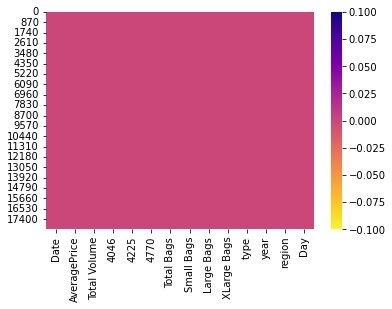

In [14]:
sns.heatmap(ndf.isnull(),cmap='plasma_r')

There is no missing value in dataset.

In [15]:
#checking duplicate

ndf.duplicated().sum()

0

No duplicate rows are present in dataset.

# Statistical Summary

In [16]:
ndf.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

                Day  
count  18249.000000  
mean      15.662612  
std        8.776281  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000

New dataset have 14 columns.

Target variable is 'AveragePrice' and it is a float64 datatype. It seems a Regression problem.

IN some Columns the value of std is greater than mean.

Outliers are present in the overall dataset because most of the features has a difference between 75% percentile and max value.

Object datatypes are'type', 'day','month' and 'region' .

The minimum value of d4046, d4225, d4770, Total_Bags, Small_Bags, Large_Bags, XLarge_Bags features is 0.(Need to impute).




# Data Visualization

 Checking Categorical Values

In [17]:
#checking for unique categorical values

ndf["type"].unique()


array(['conventional', 'organic'], dtype=object)

In [18]:
print(ndf['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


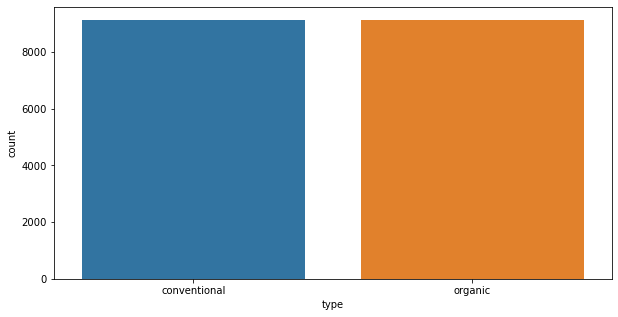

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(ndf['type'])
plt.show()

Average Price(Target) with respect to organic is approx same.

In [20]:
#checking for unique categorical values

print(ndf['region'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

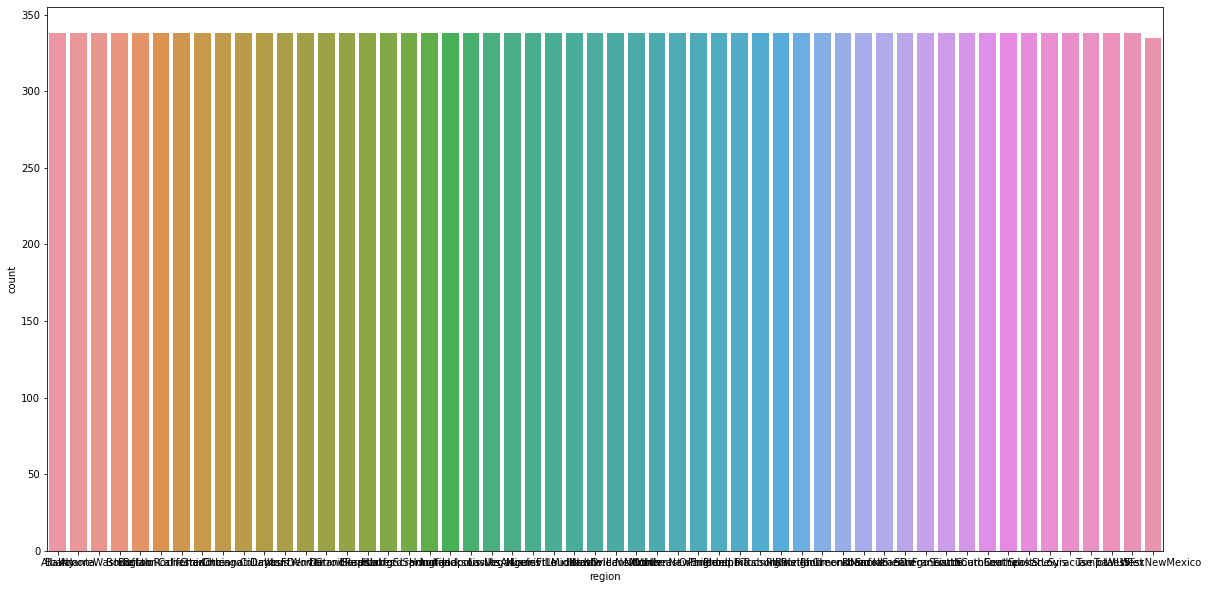

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(ndf['region'])
plt.show()

Dataset is balanced all region have same values.

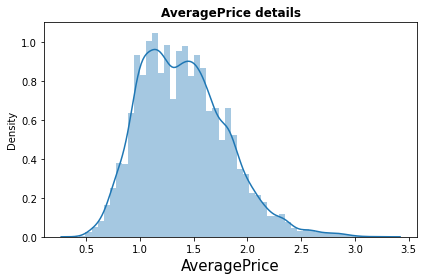

In [22]:
# Target Variable

sns.distplot(ndf.AveragePrice)
plt. title('AveragePrice details',fontsize= 12, fontweight='bold')

plt. xlabel('AveragePrice', fontsize= 15)
plt.tight_layout()
plt.show()

Average Price is target and it is a right skewed.

[2015 2016 2017 2018]


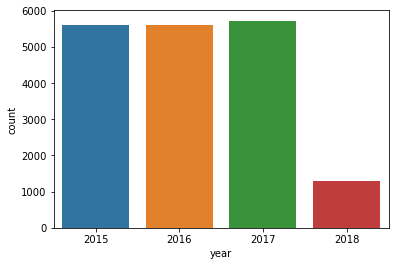

In [23]:
print(ndf.year.unique())
sns.countplot(ndf.year)
plt.show()


In [24]:
# Checking mean for Organic
ndf.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

# Ecoding Data

In [25]:
# Using Label Encoder
le=LabelEncoder()
varib=['Date','type','region']
for i in varib:
    ndf[i]=le.fit_transform(ndf[i])
ndf


Date  AveragePrice  Total Volume     4046       4225    4770  \
0        51          1.33      64236.62  1036.74   54454.85   48.16   
1        50          1.35      54876.98   674.28   44638.81   58.33   
2        49          0.93     118220.22   794.70  109149.67  130.50   
3        48          1.08      78992.15  1132.00   71976.41   72.58   
4        47          1.28      51039.60   941.48   43838.39   75.78   
...     ...           ...           ...      ...        ...     ...   
18244   161          1.63      17074.83  2046.96    1529.20    0.00   
18245   160          1.71      13888.04  1191.70    3431.50    0.00   
18246   159          1.87      13766.76  1191.92    2452.79  727.94   
18247   158          1.93      16205.22  1527.63    2981.04  727.01   
18248   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
0         8696.87     8603.62       93.25          0.0     0  2015       0   
1         9505.56     9408.07       97.49          0.0     0  2015       0   
2         8145.35     8042.21      103.14          0.0     0  2015       0   
3         5811.16     5677.40      133.76          0.0     0  2015       0   
4         6183.95     5986.26      197.69          0.0     0  2015       0   
...           ...         ...         ...          ...   ...   ...     ...   
18244    13498.67    13066.82      431.85          0.0     1  2018      53   
18245     9264.84     8940.04      324.80          0.0     1  2018      53   
18246     9394.11     9351.80       42.31          0.0     1  2018      53   
18247    10969.54    10919.54       50.00          0.0     1  2018      53   
18248    12014.15    11988.14       26.01          0.0     1  2018      53   

       Day  
0       27  
1       20  
2       13  
3        6  
4       29  
...    ...  
18244    4  
18245   28  
18246   21  
18247   14  
18248    7  

[18249 rows x 14 columns]

# Exploratory Data Analysis

Visualization

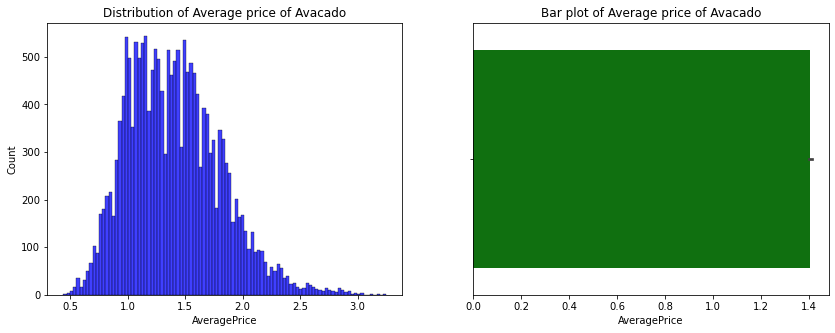

In [26]:
#Using Distribution and Bar plot

plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(ndf['AveragePrice'],color='Blue',bins=100)
plt.title('Distribution of Average price of Avacado')
 
ax=plt.subplot(1,2,2)
sns.barplot(ndf['AveragePrice'],color='g')
plt.title('Bar plot of Average price of Avacado')

plt.show()

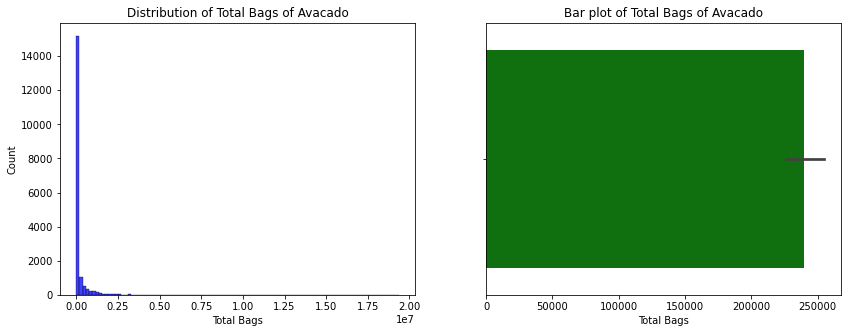

In [27]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(ndf['Total Bags'],color='Blue',bins=100)
plt.title('Distribution of Total Bags of Avacado')
 
ax=plt.subplot(1,2,2)
sns.barplot(ndf['Total Bags'],color='g')
plt.title('Bar plot of Total Bags of Avacado')

plt.show()

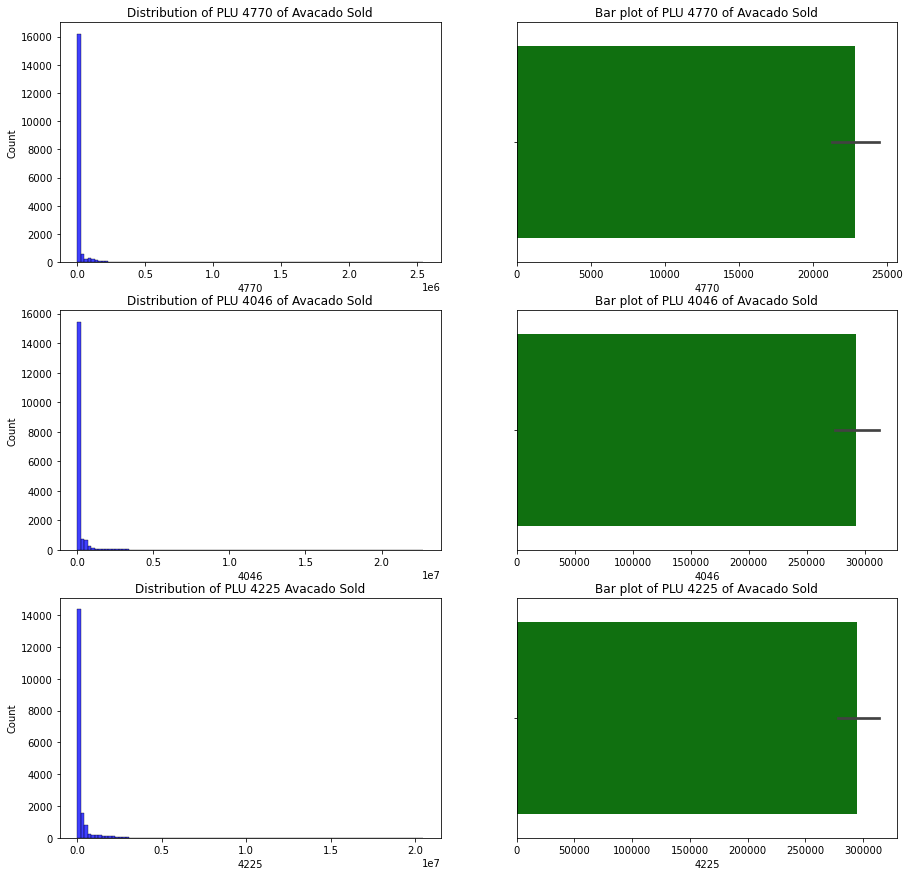

In [28]:
plt.figure(figsize=(15,15), facecolor='white')
ax=plt.subplot(3,2,1)
sns.histplot(ndf['4770'],color='Blue',bins=100)
plt.title('Distribution of PLU 4770 of Avacado Sold')
 
ax=plt.subplot(3,2,2)
sns.barplot(ndf['4770'],color='g')
plt.title('Bar plot of PLU 4770 of Avacado Sold')

ax=plt.subplot(3,2,3)
sns.histplot(ndf['4046'],color='Blue',bins=100)
plt.title('Distribution of PLU 4046 of Avacado Sold')
 
ax=plt.subplot(3,2,4)
sns.barplot(ndf['4046'],color='g')
plt.title('Bar plot of PLU 4046 of Avacado Sold')

ax=plt.subplot(3,2,5)
sns.histplot(ndf['4225'],color='Blue',bins=100)
plt.title('Distribution of PLU 4225 Avacado Sold')
 
ax=plt.subplot(3,2,6)
sns.barplot(ndf['4225'],color='g')
plt.title('Bar plot of PLU 4225 of Avacado Sold')

plt.show()

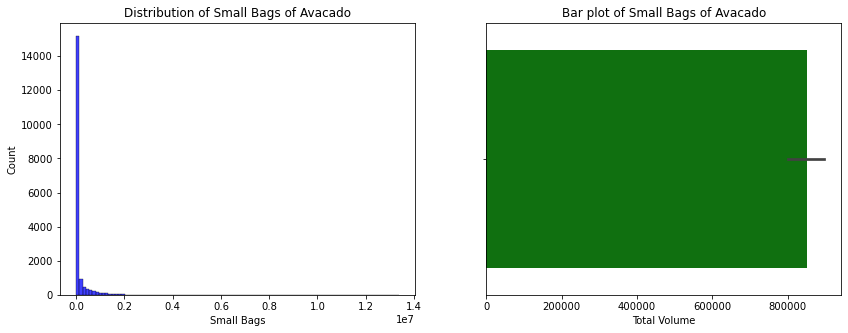

In [29]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.histplot(ndf['Small Bags'],color='Blue',bins=100)
plt.title('Distribution of Small Bags of Avacado')
 
    
ax=plt.subplot(1,2,2)
sns.barplot(ndf['Total Volume'],color='g')
plt.title('Bar plot of Small Bags of Avacado')

plt.show()

Observation:-
    
There is lot of skewness present in 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' need to be handled.

Outliers need to be confirmed and to be proceeded with removal of outliers.

# Bivariate Analysis

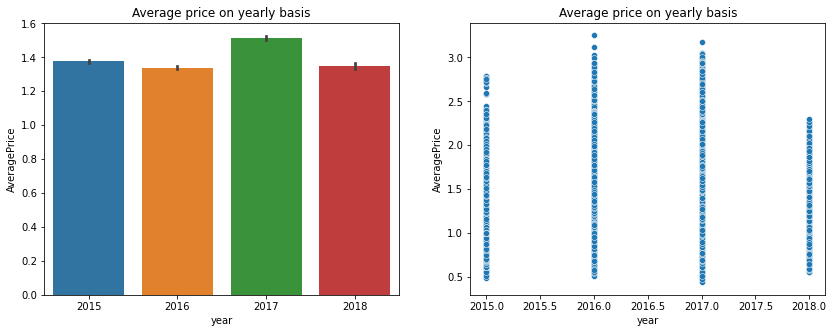

In [30]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=ndf['year'],y=ndf['AveragePrice'])
plt.title('Average price on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=ndf['year'],y=ndf['AveragePrice'])
plt.title('Average price on yearly basis')

plt.show()

The average price of Avacado has been ranging nearly equal and in 2017 it has been the highest

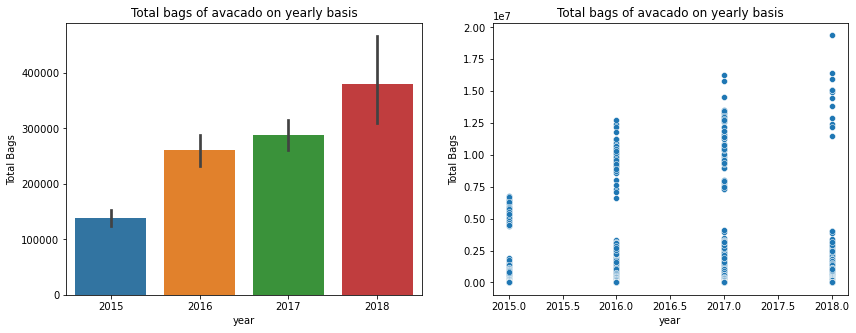

In [31]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=ndf['year'],y=ndf['Total Bags'])
plt.title('Total bags of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=ndf['year'],y=ndf['Total Bags'])
plt.title('Total bags of avacado on yearly basis')

plt.show()

The total bags of avacados has increased by nearly 10% every year and the average of total bags sold is highest in 2018

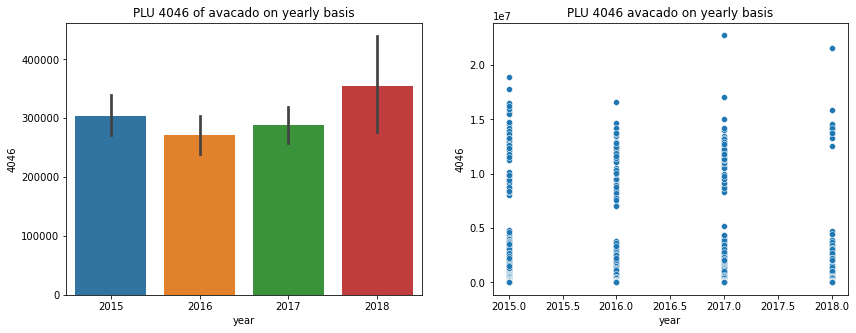

In [32]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=ndf['year'],y=ndf['4046'])
plt.title('PLU 4046 of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=ndf['year'],y=ndf['4046'])
plt.title('PLU 4046 avacado on yearly basis')

plt.show()

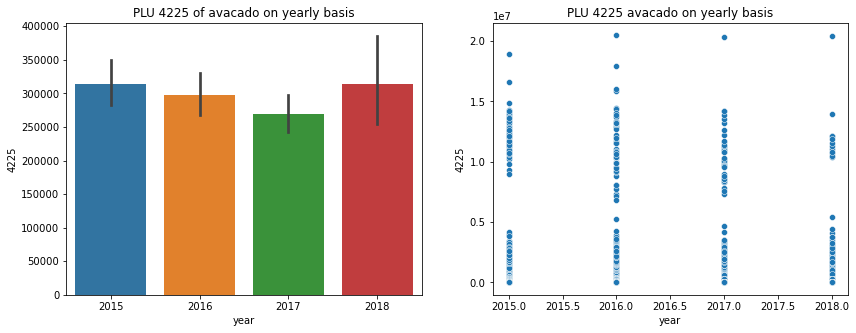

In [33]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=ndf['year'],y=ndf['4225'])
plt.title('PLU 4225 of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=ndf['year'],y=ndf['4225'])
plt.title('PLU 4225 avacado on yearly basis')

plt.show()

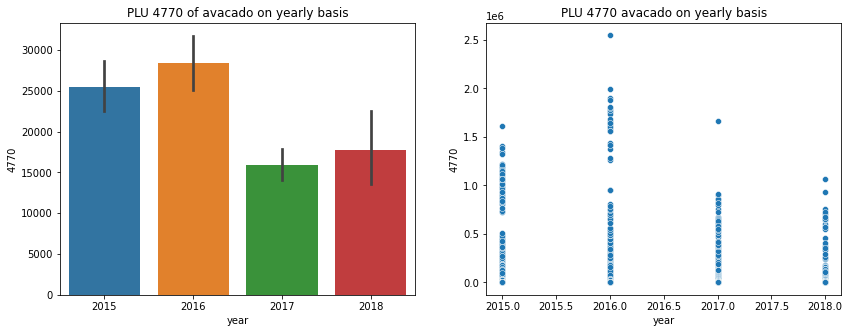

In [34]:
plt.figure(figsize=(14,5), facecolor='white')
ax=plt.subplot(1,2,1)
sns.barplot(x=ndf['year'],y=ndf['4770'])
plt.title('PLU 4770 of avacado on yearly basis')
 
ax=plt.subplot(1,2,2)
sns.scatterplot(x=ndf['year'],y=ndf['4770'])
plt.title('PLU 4770 avacado on yearly basis')

plt.show()

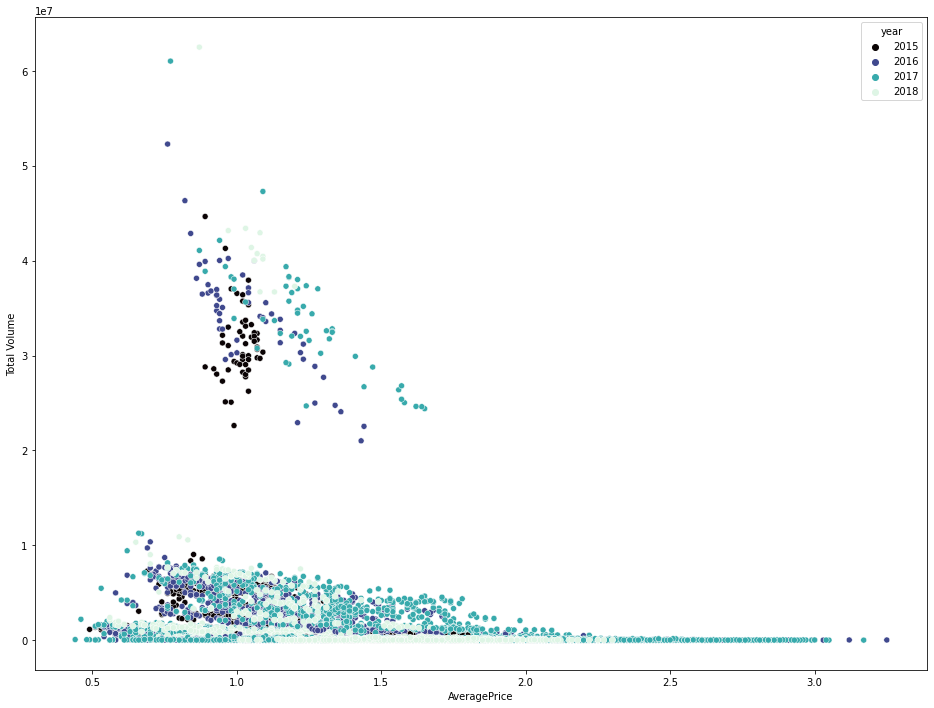

In [35]:
plt.figure(figsize=(16,12), facecolor='white')
sns.scatterplot(x=ndf['AveragePrice'],y=ndf['Total Volume'], hue=ndf['year'], palette='mako')

plt.show()

There is no much relation between average price and total volume sold on yearly basis. We can conclude that total volume sold was high in 2017.

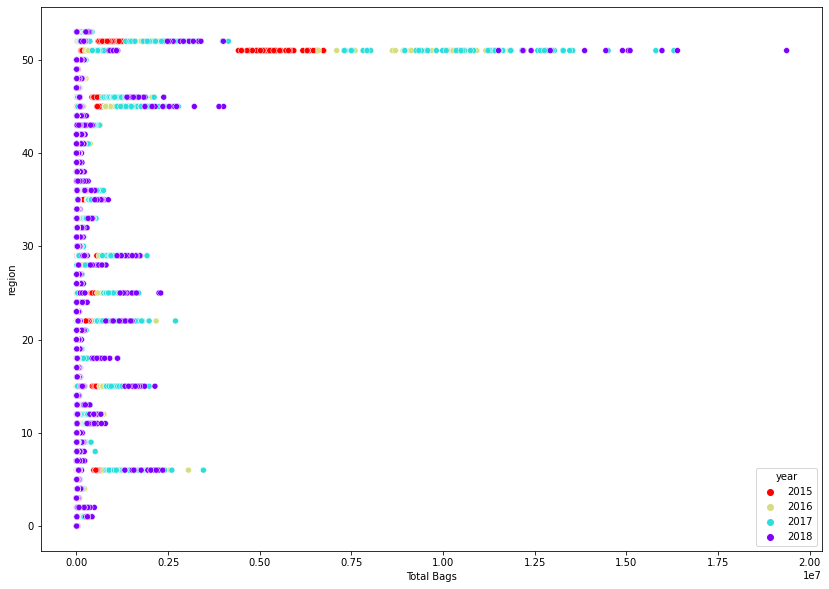

In [36]:
plt.figure(figsize=(14,10), facecolor='white')
sns.scatterplot(x=ndf['Total Bags'],y=ndf['region'], hue=ndf['year'], palette='rainbow_r')

plt.show()

Buffalo Rocher is the highest avacado consuming region, preceded by South central and West

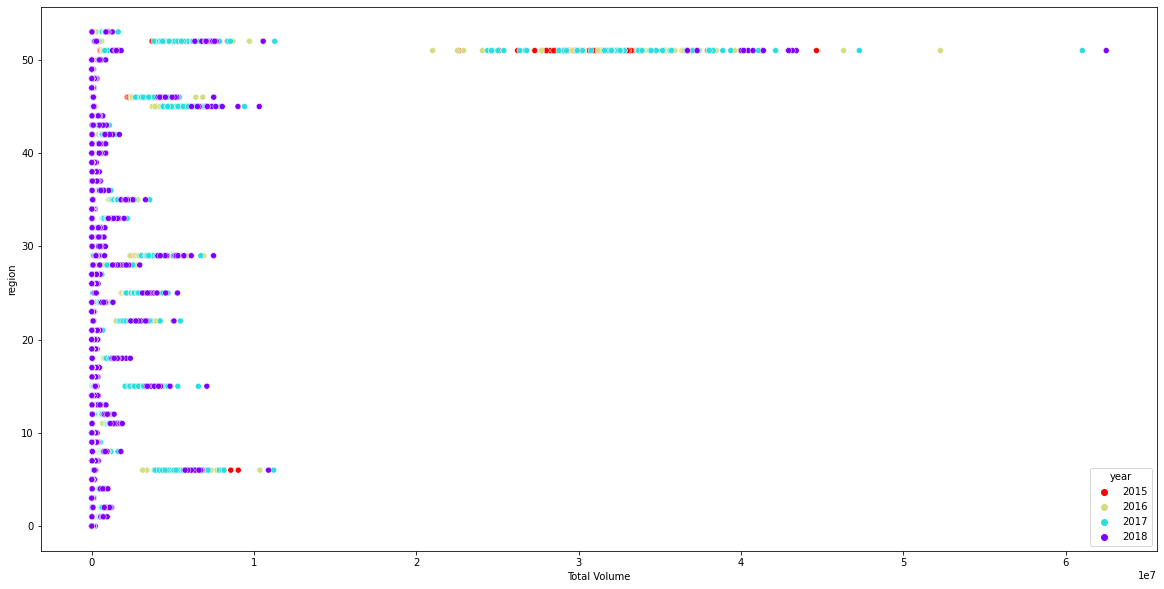

In [37]:
plt.figure(figsize=(20,10), facecolor='white')
sns.scatterplot(x=ndf['Total Volume'],y=ndf['region'], hue=ndf['year'], palette='rainbow_r')
plt.show()

<Figure size 1080x720 with 0 Axes>

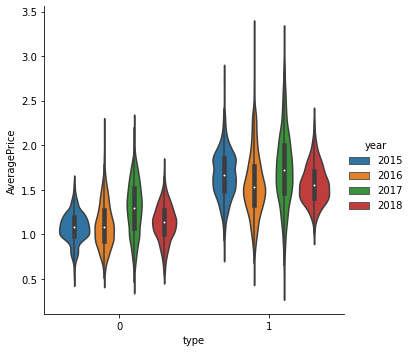

In [38]:
plt.figure(figsize=(15,10), facecolor='white')
sns.catplot(x='type',y='AveragePrice', data=ndf,hue='year', kind='violin')

plt.show()

Organic avacados are more expensive than that of conventionally available avacados.

<Figure size 1080x720 with 0 Axes>

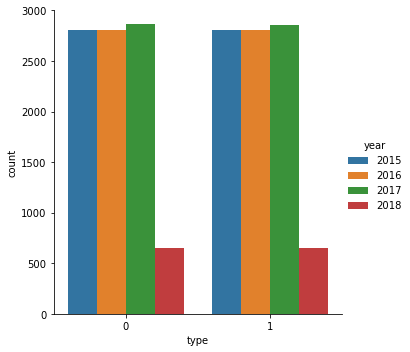

In [39]:
plt.figure(figsize=(15,10), facecolor='white')
sns.catplot(x='type', data=ndf,hue='year', kind='count')

plt.show()

Same amount of conventional avacados were consumed every year.

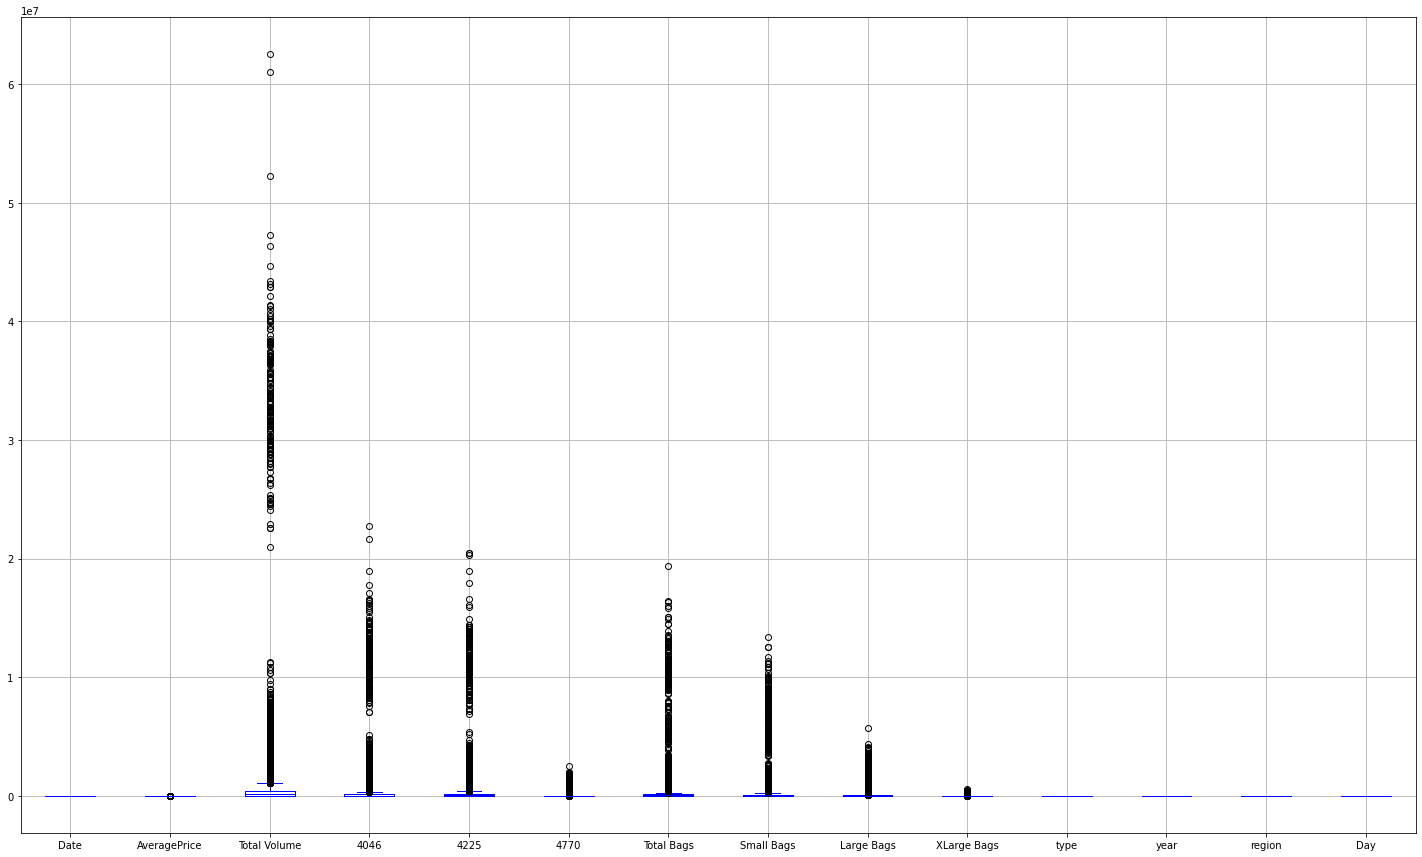

In [40]:
ndf.boxplot(figsize=(25,15),color='b')
plt.subplots_adjust()
plt.show()


Outliers in Total Volume, 4046,4225,4770, Total Bags, Small Bags, Large Bags

<Figure size 1080x720 with 0 Axes>

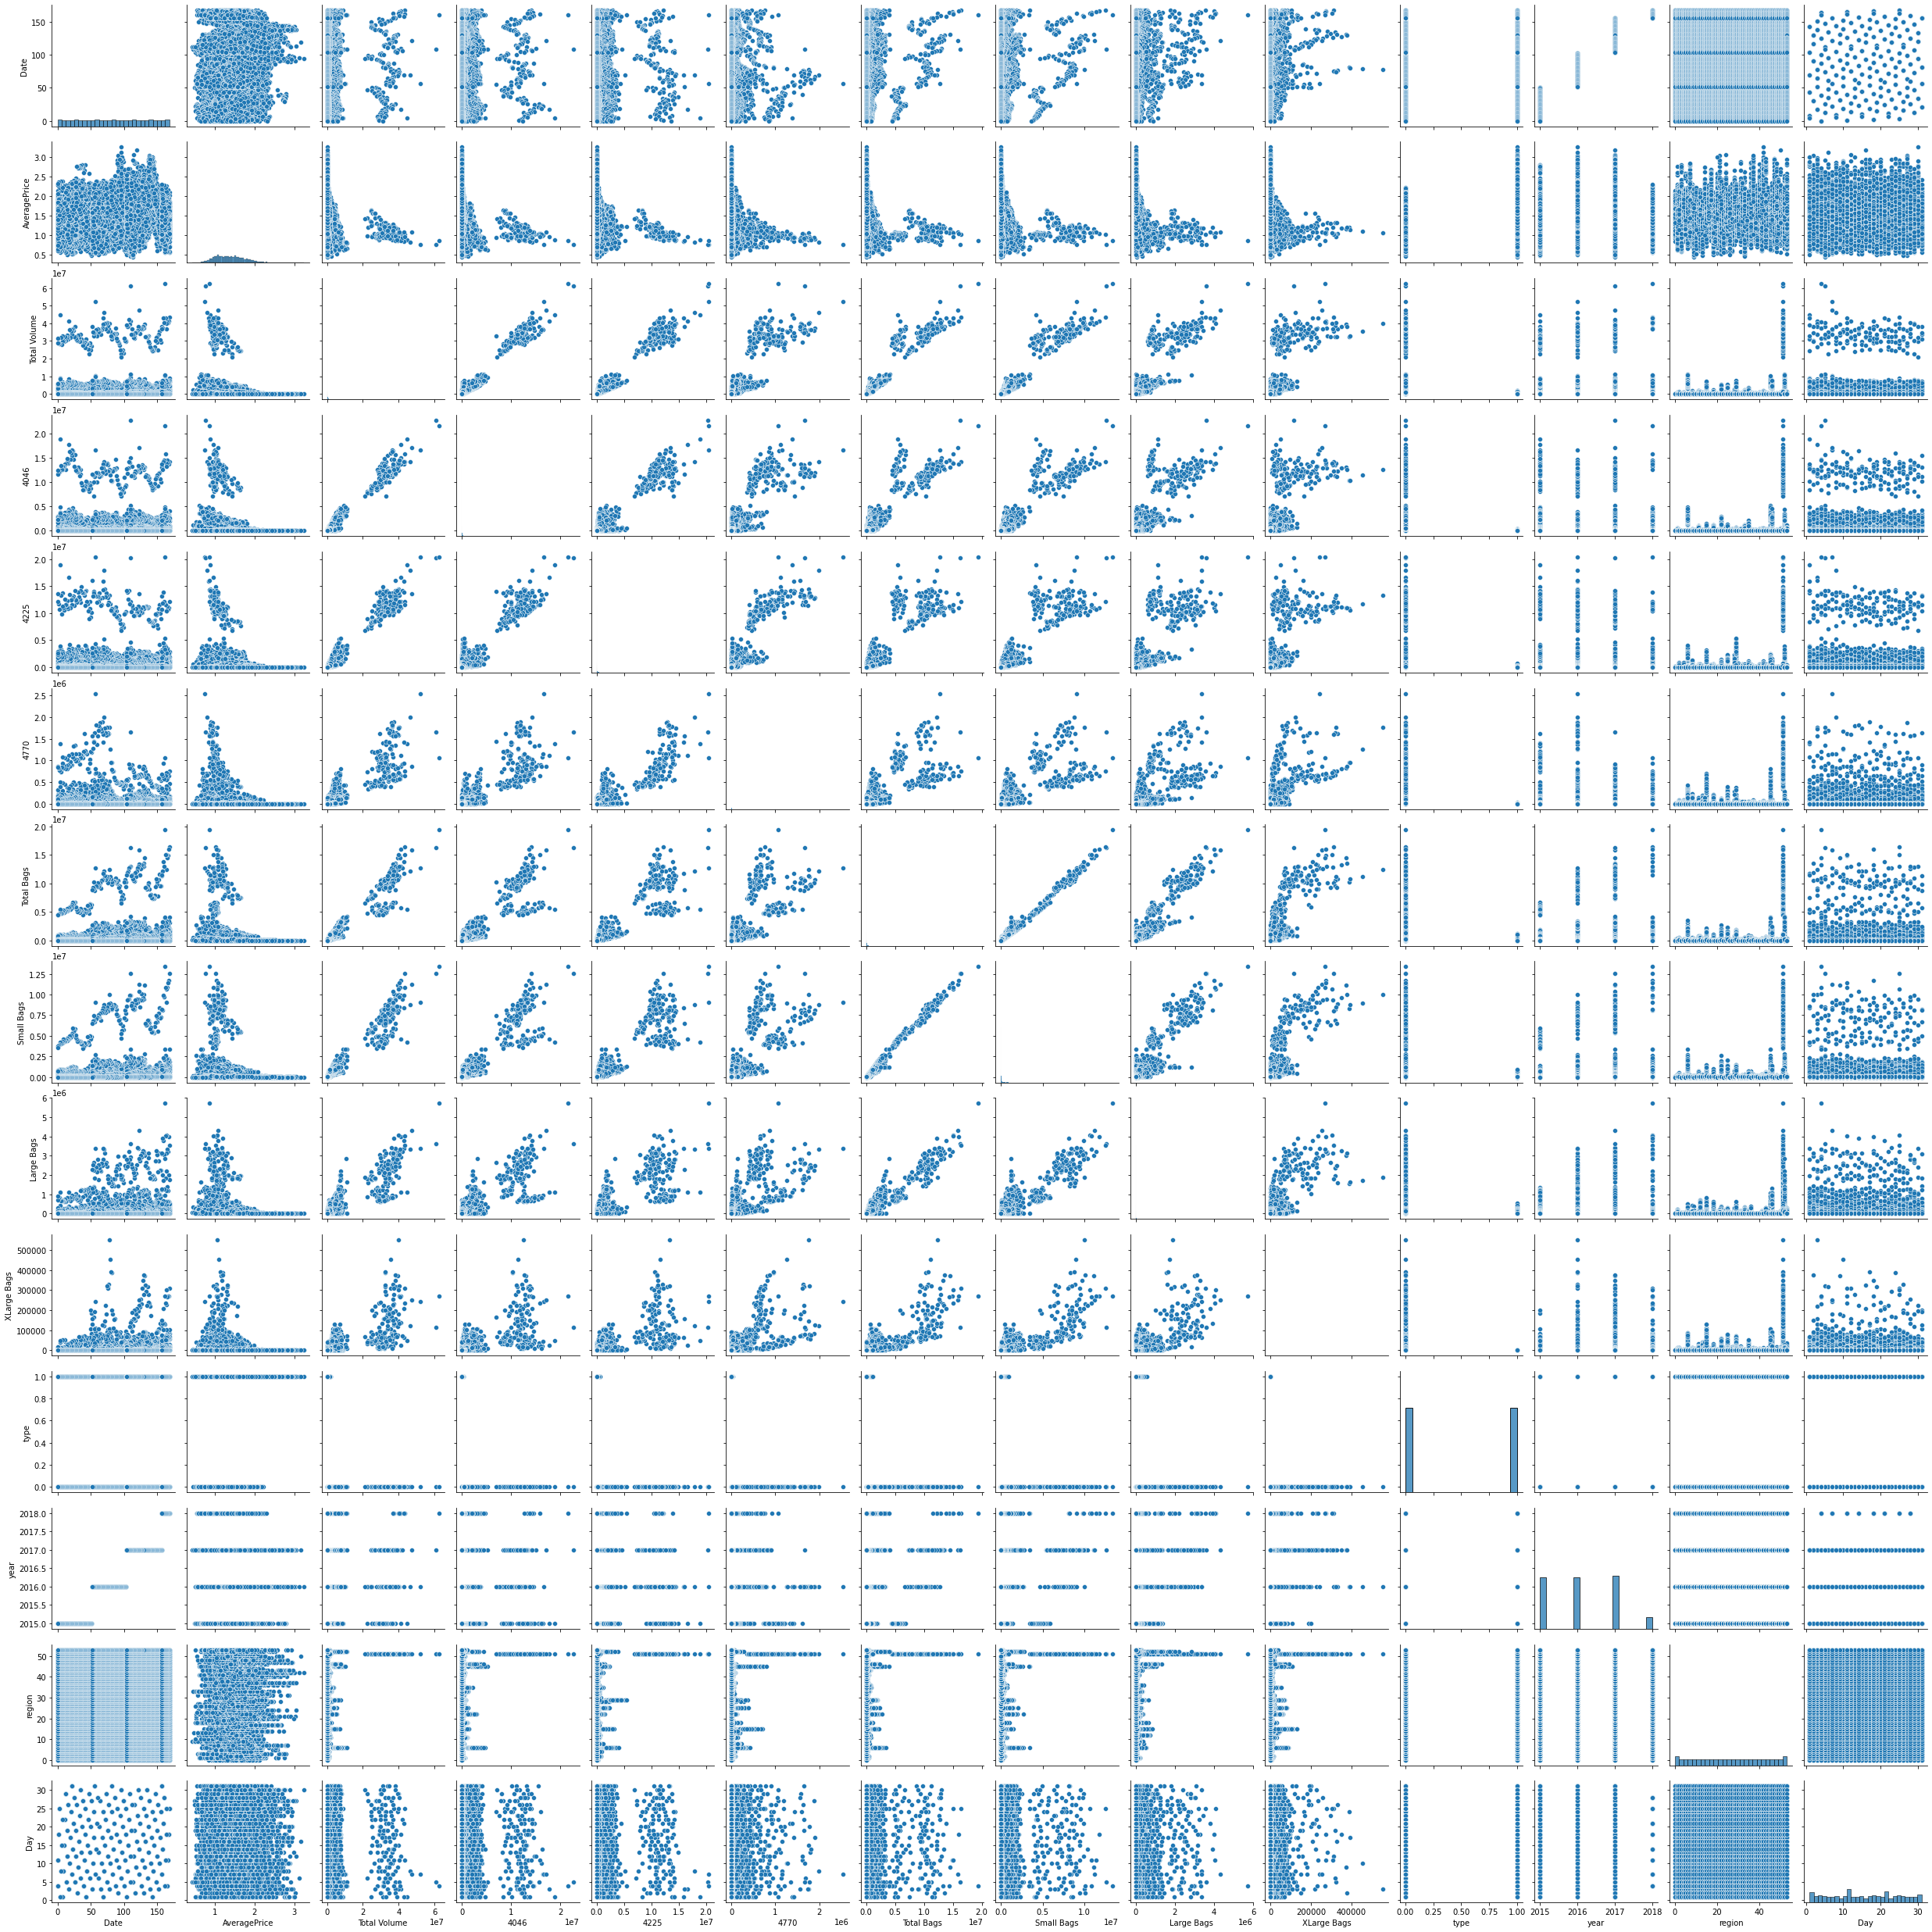

In [41]:
# Using Pair plot for Multicolinearity
plt.figure(figsize=(15,10), facecolor='white')
sns.pairplot(ndf,palette='pink_r')
plt.show()

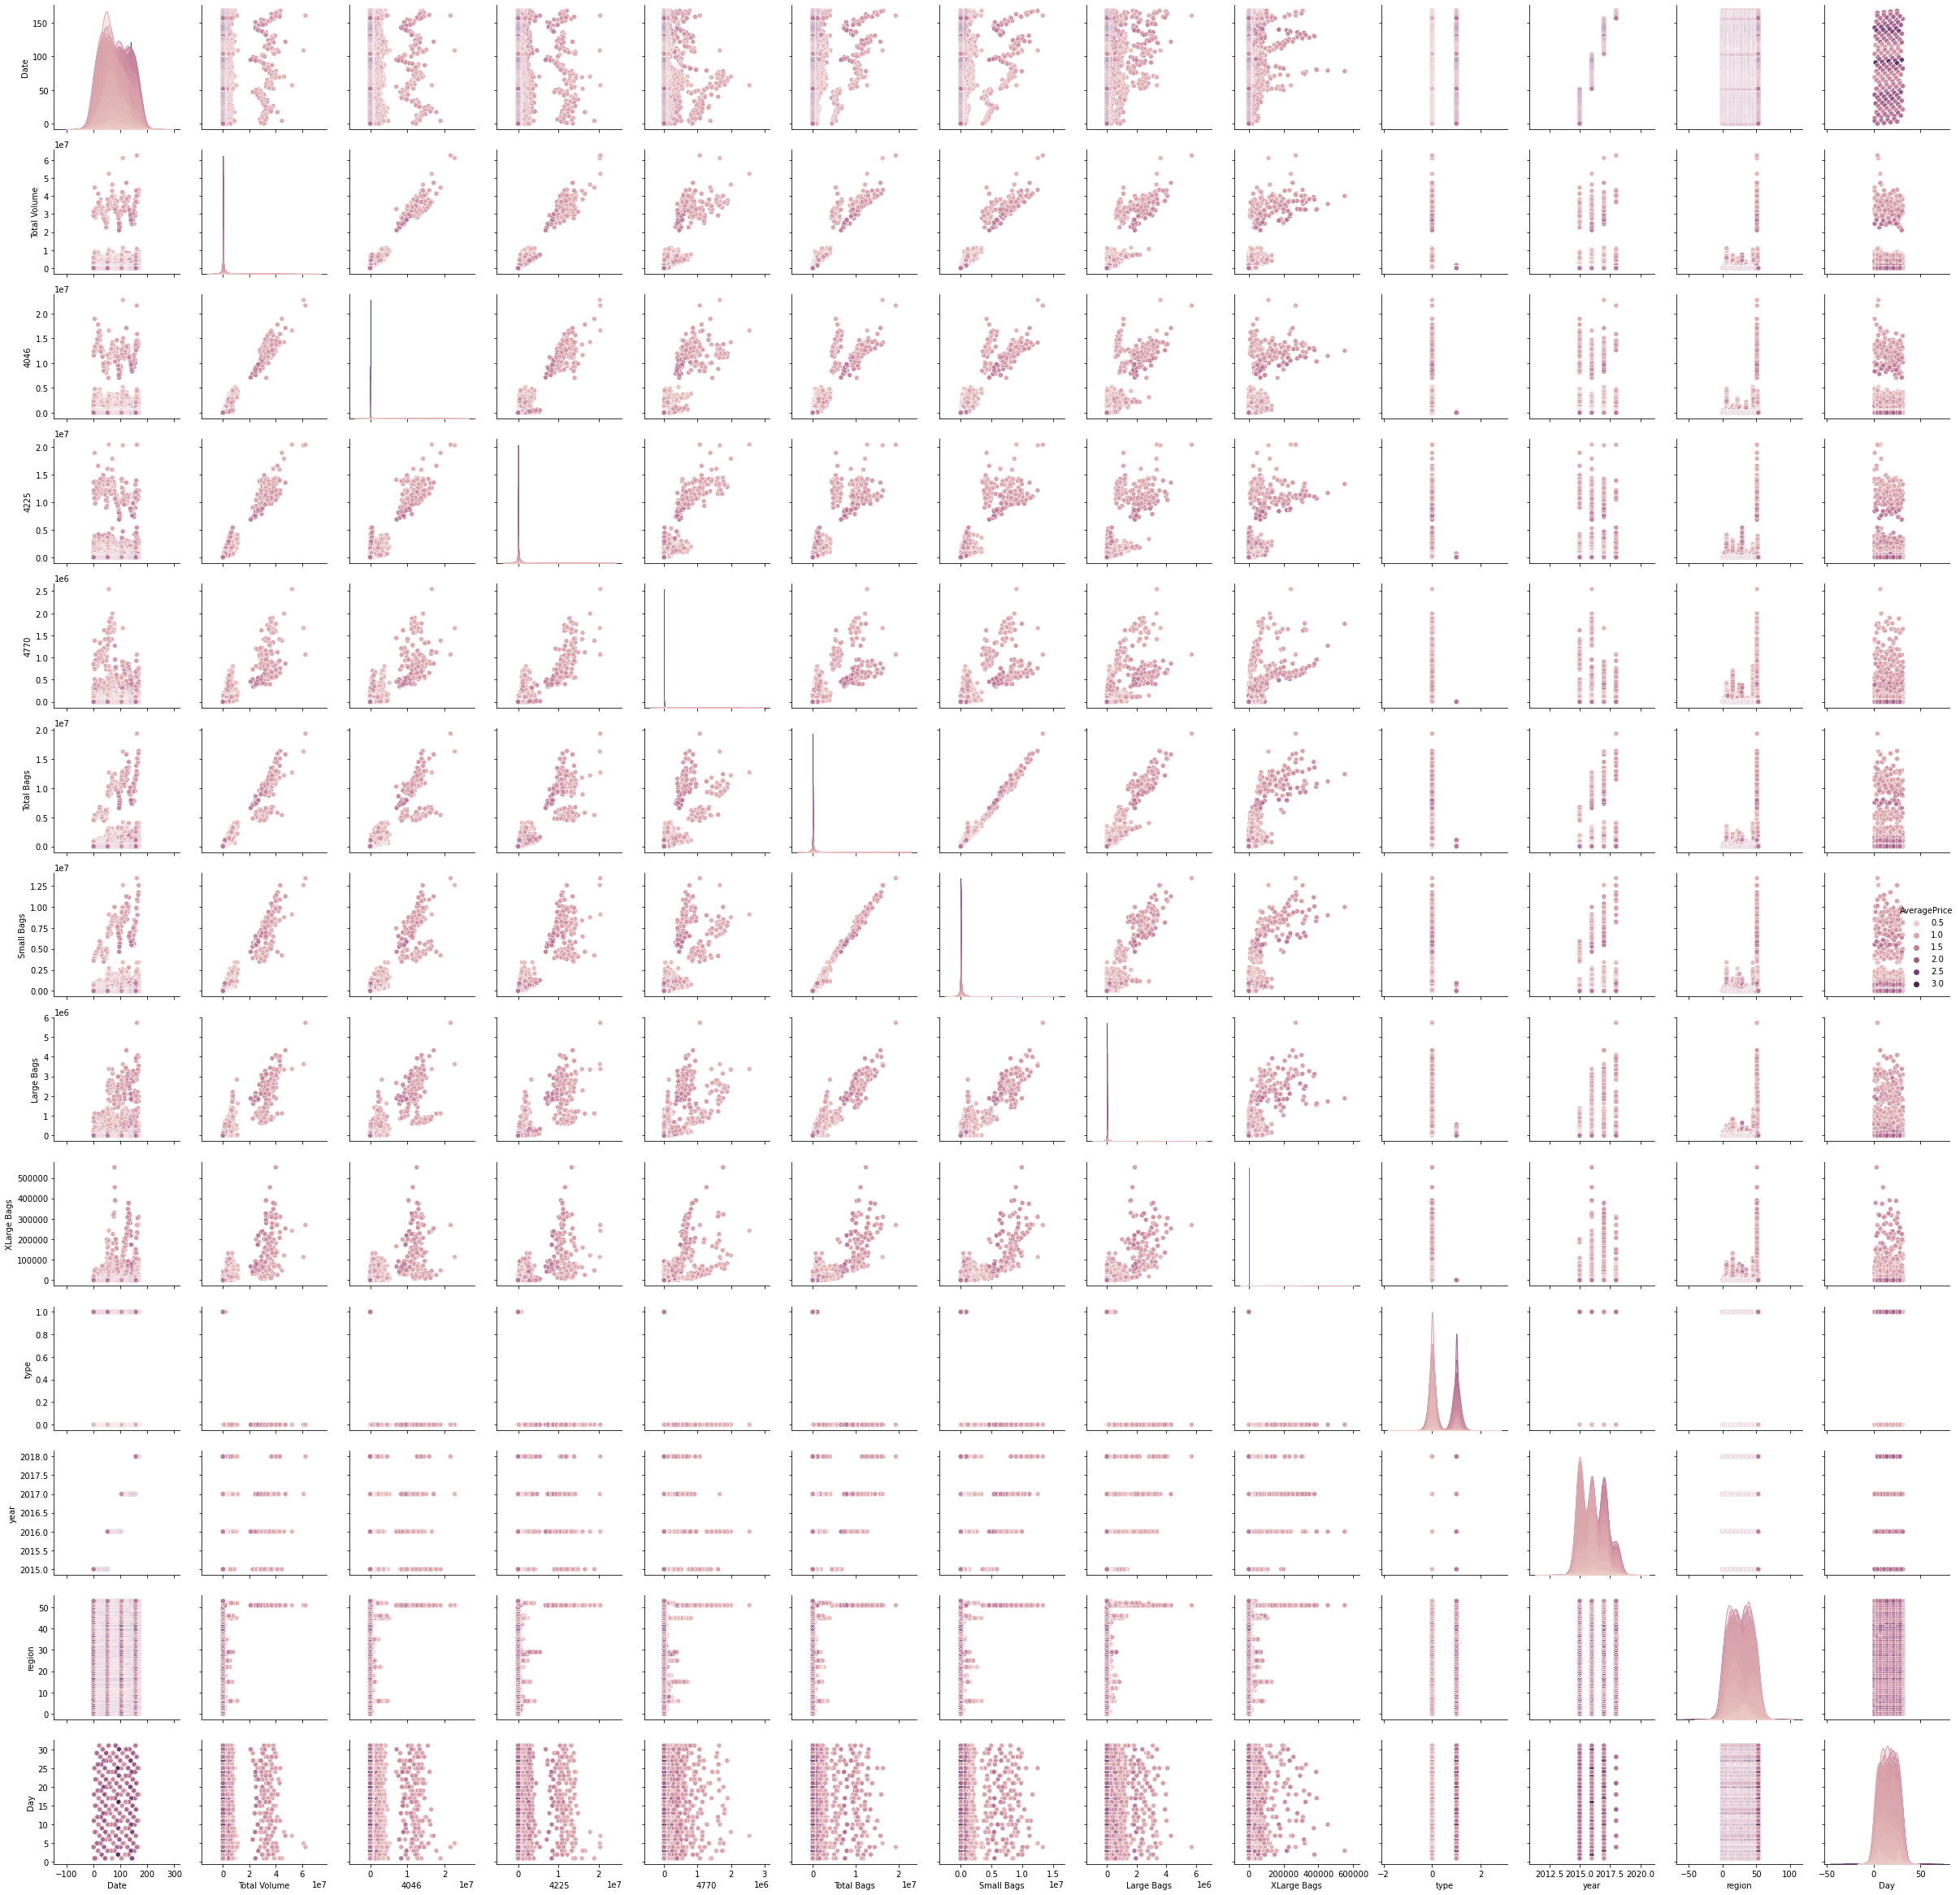

In [42]:
sns.pairplot(ndf, hue= "AveragePrice", kind= 'scatter')
plt.tight_layout()
plt.show()

# Correlation Matrix

In [43]:
#checking correlation of each attribute with target variable
corr = ndf.corrwith(ndf['AveragePrice'])

In [44]:
corr

Date            0.145514
AveragePrice    1.000000
Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
Day             0.027386
dtype: float64

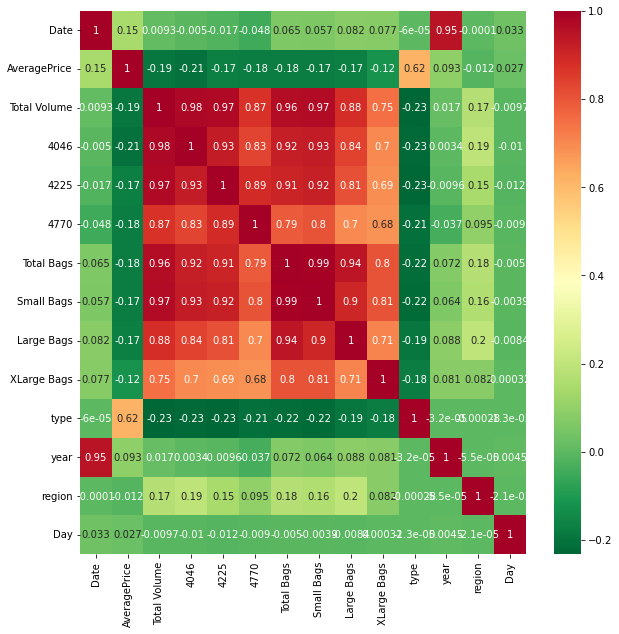

In [45]:
#checking correlation of each attributes with other
ncorr = ndf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(ncorr,cmap='RdYlGn_r', annot=True)
plt.show()

'd4046', 'd4225', 'd4770' are highly correlated with Total_Volume.

Small bags are highly correlated with Total Bags correlation coeffient 0.99, this means that most of bags are small.

Almost all features except year are highly negatively correlated with the target variable.

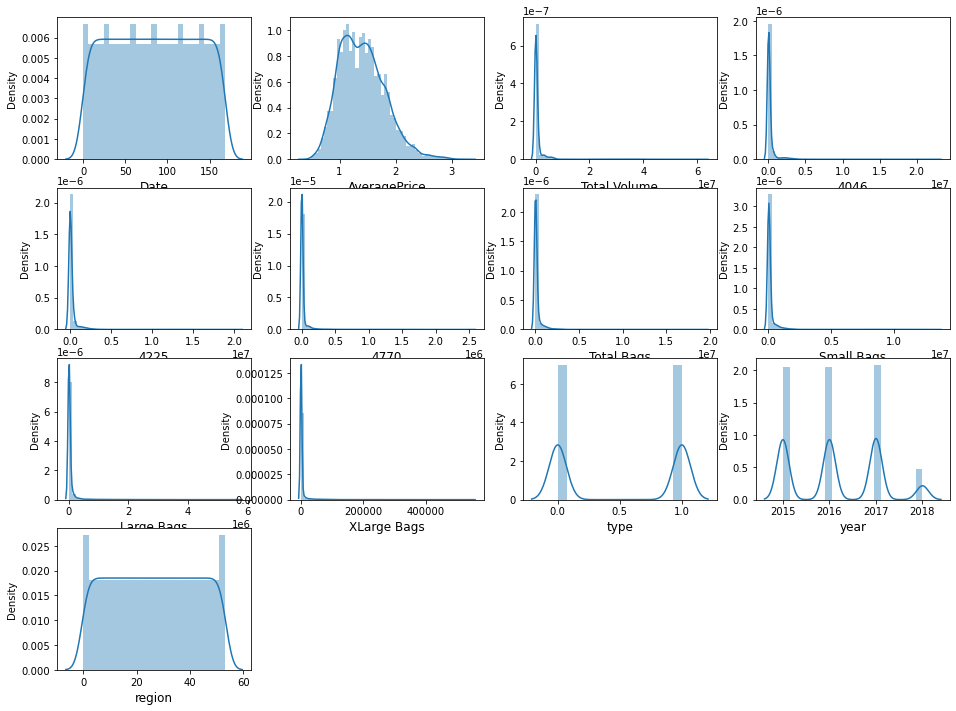

In [46]:
# Using Distribution Plot

plt.figure(figsize=(16,12))
plotnumber=1

for col in ndf:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(ndf[col])
        plt.xlabel(col,fontsize=12)
        
        plotnumber+=1
        plt.tight_layout


Outliers are present.
Every features,outliers with sharp peak is present.
Mainly all features are right skewed.
Averageprice is in between 1-2.
 

In [47]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int32  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int32  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


# Checking Skewness

In [48]:
# checking skewness
ndf.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Day              0.014310
dtype: float64

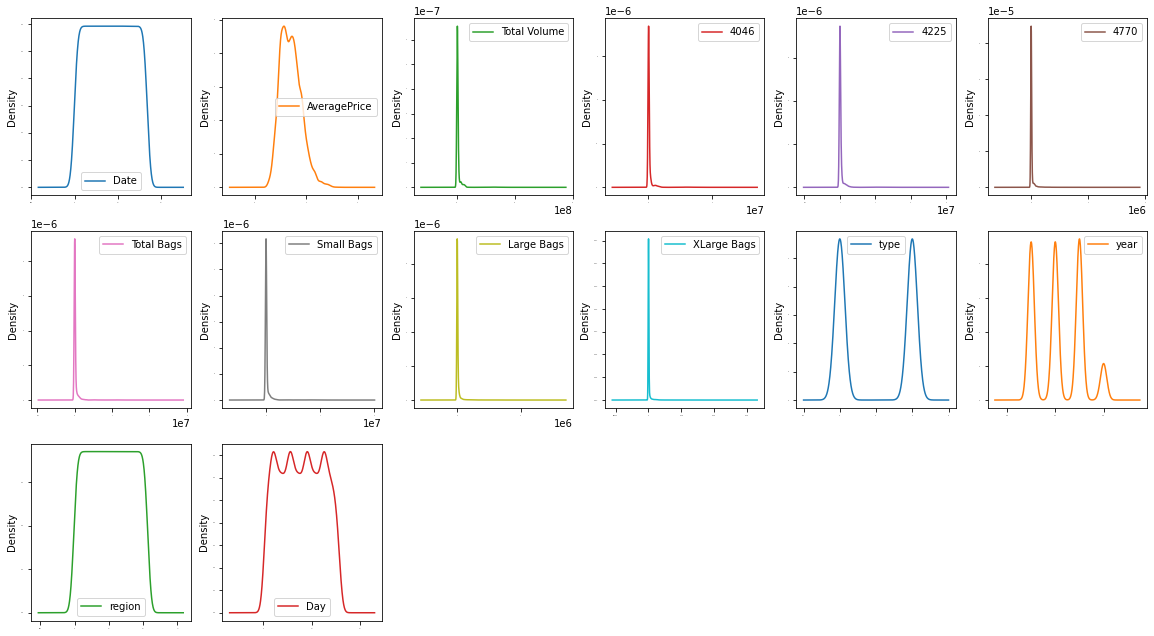

In [49]:
ndf.plot(kind='density',subplots=True,layout=(4,6),sharex=False,legend=True,fontsize=1,figsize=(20,15))
plt.show()


In [50]:
x=ndf.drop(['AveragePrice'],axis=1)
y=ndf['AveragePrice']


In [51]:
x.skew().sort_values()

region           0.000030
Date             0.000117
type             0.000329
Day              0.014310
year             0.215339
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

Above values shows there is lot of right sided skeweness in dataset.

# Removing Skewness

In [52]:
x_skew=np.cbrt(x[x.columns])
x_skew.skew()

Date           -0.971817
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.214909
region         -1.172781
Day            -0.698246
dtype: float64

In [53]:
# Using Power Transformation Technique
x_new=power_transform(x_skew)
x_new

array([[-5.84231957e-01, -8.86851387e-02, -6.67073964e-01, ...,
        -1.66949787e-14, -2.19577142e+00,  1.23131338e+00],
       [-6.06168569e-01, -1.58154210e-01, -7.82134862e-01, ...,
        -1.66949787e-14, -2.19577142e+00,  5.34961358e-01],
       [-6.28220713e-01,  1.78608306e-01, -7.38552067e-01, ...,
        -1.66949787e-14, -2.19577142e+00, -2.17979252e-01],
       ...,
       [ 1.41727754e+00, -7.75325101e-01, -6.29106388e-01, ...,
         2.69922973e-14,  1.54465713e+00,  6.37265002e-01],
       [ 1.40074201e+00, -7.01944149e-01, -5.60775708e-01, ...,
         2.69922973e-14,  1.54465713e+00, -1.05629538e-01],
       [ 1.38418206e+00, -6.67672370e-01, -3.80256010e-01, ...,
         2.69922973e-14,  1.54465713e+00, -9.46199644e-01]])

In [54]:
X=pd.DataFrame(x_new,columns=x.columns)
X


Date  Total Volume      4046      4225      4770  Total Bags  \
0     -0.584232     -0.088685 -0.667074  0.306945 -0.178290   -0.528822   
1     -0.606169     -0.158154 -0.782135  0.230613 -0.141875   -0.490578   
2     -0.628221      0.178608 -0.738552  0.581288  0.016451   -0.556920   
3     -0.650392      0.002248 -0.643184  0.415636 -0.099721   -0.700609   
4     -0.672685     -0.190194 -0.693122  0.223711 -0.091325   -0.674293   
...         ...           ...       ...       ...       ...         ...   
18244  1.450276     -0.678453 -0.478926 -0.926164 -1.276496   -0.338490   
18245  1.433789     -0.771375 -0.629157 -0.672791 -1.276496   -0.501624   
18246  1.417278     -0.775325 -0.629106 -0.779870  0.378277   -0.495659   
18247  1.400742     -0.701944 -0.560776 -0.717983  0.377998   -0.428697   
18248  1.384182     -0.667672 -0.380256 -0.792518  0.127493   -0.389231   

       Small Bags  Large Bags  XLarge Bags      type          year    region  \
0       -0.348336   -0.725134    -0.708808 -0.999836 -1.669498e-14 -2.195771   
1       -0.314277   -0.716582    -0.708808 -0.999836 -1.669498e-14 -2.195771   
2       -0.373885   -0.705678    -0.708808 -0.999836 -1.669498e-14 -2.195771   
3       -0.503509   -0.654352    -0.708808 -0.999836 -1.669498e-14 -2.195771   
4       -0.484028   -0.574084    -0.708808 -0.999836 -1.669498e-14 -2.195771   
...           ...         ...          ...       ...           ...       ...   
18244   -0.186980   -0.402052    -0.708808  1.000164  2.699230e-14  1.544657   
18245   -0.333751   -0.466559    -0.708808  1.000164  2.699230e-14  1.544657   
18246   -0.316571   -0.869126    -0.708808  1.000164  2.699230e-14  1.544657   
18247   -0.256960   -0.839950    -0.708808  1.000164  2.699230e-14  1.544657   
18248   -0.220691   -0.950356    -0.708808  1.000164  2.699230e-14  1.544657   

            Day  
0      1.231313  
1      0.534961  
2     -0.217979  
3     -1.081017  
4      1.422997  
...         ...  
18244 -1.371261  
18245  1.327503  
18246  0.637265  
18247 -0.105630  
18248 -0.946200  

[18249 rows x 13 columns]

# Distribution plot after treating skewness

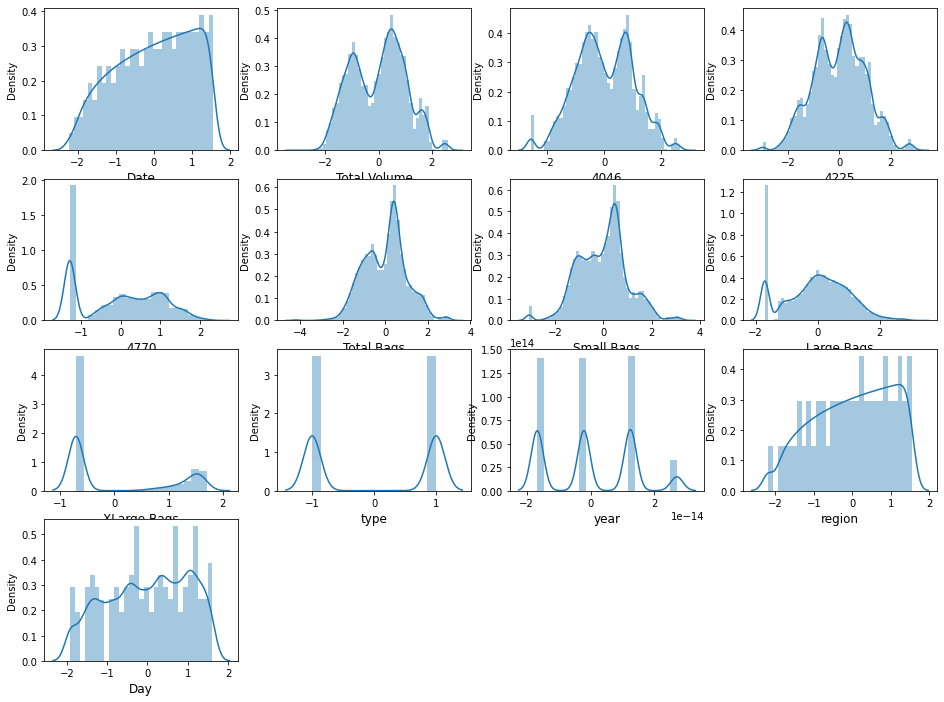

In [55]:
plt.figure(figsize=(16,12))
plotnumber=1

for col in X:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=12)
        
        plotnumber+=1
        plt.tight_layout

Now we can see all skewness are removed from the whole dataset But, XL bags are still skewed.

# Checking Outliers

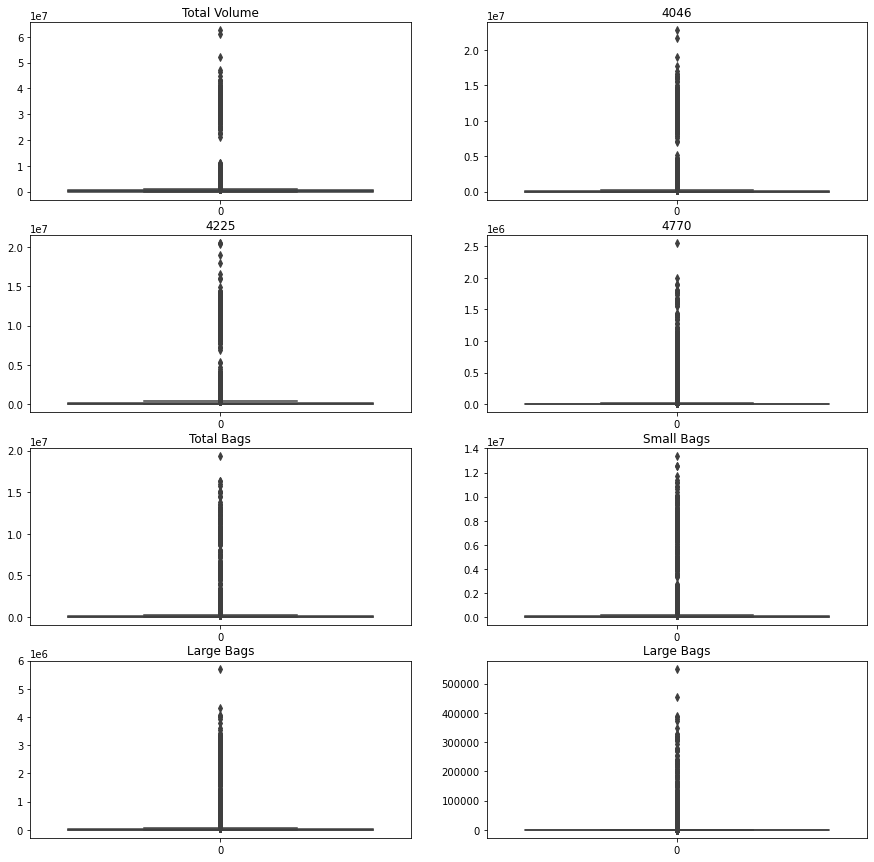

In [56]:
# checking outliers

plt.figure(figsize=(15,15), facecolor='white')
ax=plt.subplot(4,2,1)
sns.boxplot(data=ndf['Total Volume'])
plt.title('Total Volume')

ax=plt.subplot(4,2,2)
sns.boxplot(data=ndf['4046'])
plt.title('4046')

ax=plt.subplot(4,2,3)
sns.boxplot(data=ndf['4225'])
plt.title('4225')

ax=plt.subplot(4,2,4)
sns.boxplot(data=ndf['4770'])
plt.title('4770')

ax=plt.subplot(4,2,5)
sns.boxplot(data=ndf['Total Bags'])
plt.title('Total Bags')

ax=plt.subplot(4,2,6)
sns.boxplot(data=ndf['Small Bags'])
plt.title('Small Bags')

ax=plt.subplot(4,2,7)
sns.boxplot(data=ndf['Large Bags'])
plt.title('Large Bags')

ax=plt.subplot(4,2,8)
sns.boxplot(data=ndf['XLarge Bags'])
plt.title('Large Bags')

plt.show()

we can see that there is outiers in featues columns.

# Removal of Outliers

In [58]:
# Using Z Score Method
scores=np.abs(zscore(ndf))
t=3
np.where(scores<3)


(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64),
 array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))

In [59]:
ndf_out=ndf[(scores<3).all(axis=1)]
ndf_out.shape   


(17651, 14)

In [60]:
ndf.shape

(18249, 14)

# Data Loss
DL=  (18249-17651)= 598 data points

In [61]:
# Index Reset
ndf_out.reset_index()

index  Date  AveragePrice  Total Volume     4046       4225    4770  \
0          0    51          1.33      64236.62  1036.74   54454.85   48.16   
1          1    50          1.35      54876.98   674.28   44638.81   58.33   
2          2    49          0.93     118220.22   794.70  109149.67  130.50   
3          3    48          1.08      78992.15  1132.00   71976.41   72.58   
4          4    47          1.28      51039.60   941.48   43838.39   75.78   
...      ...   ...           ...           ...      ...        ...     ...   
17646  18244   161          1.63      17074.83  2046.96    1529.20    0.00   
17647  18245   160          1.71      13888.04  1191.70    3431.50    0.00   
17648  18246   159          1.87      13766.76  1191.92    2452.79  727.94   
17649  18247   158          1.93      16205.22  1527.63    2981.04  727.01   
17650  18248   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  \
0         8696.87     8603.62       93.25          0.0     0  2015       0   
1         9505.56     9408.07       97.49          0.0     0  2015       0   
2         8145.35     8042.21      103.14          0.0     0  2015       0   
3         5811.16     5677.40      133.76          0.0     0  2015       0   
4         6183.95     5986.26      197.69          0.0     0  2015       0   
...           ...         ...         ...          ...   ...   ...     ...   
17646    13498.67    13066.82      431.85          0.0     1  2018      53   
17647     9264.84     8940.04      324.80          0.0     1  2018      53   
17648     9394.11     9351.80       42.31          0.0     1  2018      53   
17649    10969.54    10919.54       50.00          0.0     1  2018      53   
17650    12014.15    11988.14       26.01          0.0     1  2018      53   

       Day  
0       27  
1       20  
2       13  
3        6  
4       29  
...    ...  
17646    4  
17647   28  
17648   21  
17649   14  
17650    7  

[17651 rows x 15 columns]

# Split Target and Features

In [62]:
X_new=ndf_out.drop(['AveragePrice'],axis=1)
Y=ndf_out['AveragePrice']
features=X_new.columns
features


Index(['Date', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Day'],
      dtype='object')

# Scaling of Data

In [64]:
# Using Standard Scaler

std=StandardScaler()
x_scaled=pd.DataFrame(std.fit_transform(X_new))
x_scaled


0         1         2         3         4         5         6   \
0     -0.664946 -0.392009 -0.349452 -0.278497 -0.322219 -0.429348 -0.400967   
1     -0.685424 -0.401251 -0.350276 -0.303093 -0.321924 -0.426481 -0.397462   
2     -0.705902 -0.338702 -0.350002 -0.141449 -0.319832 -0.431303 -0.403413   
3     -0.726380 -0.377438 -0.349235 -0.234593 -0.321511 -0.439577 -0.413717   
4     -0.746858 -0.405040 -0.349668 -0.305098 -0.321418 -0.438256 -0.412371   
...         ...       ...       ...       ...       ...       ...       ...   
17646  1.587626 -0.438579 -0.347153 -0.411112 -0.323616 -0.412326 -0.381520   
17647  1.567148 -0.441726 -0.349099 -0.406345 -0.323616 -0.427335 -0.399501   
17648  1.546670 -0.441846 -0.349098 -0.408798 -0.302508 -0.426876 -0.397707   
17649  1.526192 -0.439438 -0.348335 -0.407474 -0.302535 -0.421292 -0.390876   
17650  1.505714 -0.438169 -0.345225 -0.409040 -0.317105 -0.417589 -0.386220   

             7         8         9         10        11        12  
0     -0.379832 -0.259027 -1.019047 -1.210013 -1.695495  1.289309  
1     -0.379774 -0.259027 -1.019047 -1.210013 -1.695495  0.491652  
2     -0.379696 -0.259027 -1.019047 -1.210013 -1.695495 -0.306004  
3     -0.379277 -0.259027 -1.019047 -1.210013 -1.695495 -1.103660  
4     -0.378402 -0.259027 -1.019047 -1.210013 -1.695495  1.517211  
...         ...       ...       ...       ...       ...       ...  
17646 -0.375195 -0.259027  0.981309  1.980756  1.747054 -1.331562  
17647 -0.376661 -0.259027  0.981309  1.980756  1.747054  1.403260  
17648 -0.380529 -0.259027  0.981309  1.980756  1.747054  0.605603  
17649 -0.380424 -0.259027  0.981309  1.980756  1.747054 -0.192053  
17650 -0.380753 -0.259027  0.981309  1.980756  1.747054 -0.989709  

[17651 rows x 13 columns]

# Principal Component Analysis

In [65]:
# Using PCA

# Total we have 13 features in the data

pca=PCA(n_components=13)

# Fit the data to PCA
data_pca=pca.fit_transform(x_scaled) 
pca_df=pd.DataFrame(data_pca,columns=features)
pca_df


Date  Total Volume      4046      4225      4770  Total Bags  \
0     -0.858039      1.297667  1.588707  1.235542 -1.013972   -0.699622   
1     -0.868149      1.331625  1.546419  0.440675 -1.013025   -0.666128   
2     -0.789907      1.385817  1.513961 -0.357032 -1.009470   -0.651002   
3     -0.845735      1.413496  1.468840 -1.151006 -1.013154   -0.609639   
4     -0.881841      1.345683  1.596649  1.463697 -1.014495   -0.706073   
...         ...           ...       ...       ...       ...         ...   
17646 -1.101576     -2.498915 -1.503933 -1.309331  0.538402    0.929941   
17647 -1.116824     -2.560724 -1.364121  1.417726  0.534746    0.824682   
17648 -1.111911     -2.521258 -1.397797  0.622450  0.538336    0.863389   
17649 -1.105383     -2.484764 -1.439609 -0.172769  0.540611    0.893360   
17650 -1.105505     -2.450002 -1.486114 -0.967913  0.540848    0.919794   

       Small Bags  Large Bags  XLarge Bags      type      year    region  \
0        0.528071   -0.319652    -0.060963 -0.048520  0.346379  0.000002   
1        0.553892   -0.314384    -0.059686 -0.075020  0.349171  0.000002   
2        0.470421   -0.351138    -0.112576  0.019653  0.352560  0.000003   
3        0.536174   -0.324861    -0.083672 -0.036330  0.355137  0.000003   
4        0.550504   -0.308338    -0.053094 -0.054603  0.283320  0.000002   
...           ...         ...          ...       ...       ...       ...   
17646   -0.782789    0.213315     0.186690  0.049974 -0.240262 -0.000006   
17647   -0.815546    0.217613     0.200228  0.094254 -0.314317 -0.000006   
17648   -0.812127    0.230582     0.200583  0.077998 -0.311239 -0.000006   
17649   -0.801018    0.227443     0.193770  0.064849 -0.308366 -0.000006   
17650   -0.783166    0.214769     0.188214  0.055044 -0.305627 -0.000006   

                Day  
0      5.491371e-09  
1      5.199894e-09  
2      4.420603e-09  
3      4.396657e-09  
4      5.029075e-09  
...             ...  
17646  2.679418e-09  
17647  3.202420e-09  
17648  2.866192e-09  
17649  2.492827e-09  
17650  2.146384e-09  

[17651 rows x 13 columns]

# Model Building

In [66]:
x_train,x_test,y_train,y_test=train_test_split(pca_df,Y,test_size=0.25,random_state=42)
print(len(x_train),len(x_test),len(y_train),len(y_test))
y_test


13238 4413 13238 4413


3596     1.36
7141     1.70
4625     1.22
5456     0.81
10969    1.85
         ... 
3618     1.05
16950    1.97
11096    1.73
4588     1.30
9061     0.90
Name: AveragePrice, Length: 4413, dtype: float64

# using different Regression Models for predictions

# Lasso

In [67]:
# Using Lasso

alpha_value={'alpha':[1,.1,.01,.001,.0001,0]}
model_test=Lasso()
grid=GridSearchCV(estimator=model_test,param_grid=alpha_value)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)



GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.44400920800533206
0.0001
{'alpha': 0.0001}


# DecisionTree Regressor

In [69]:
# Using DecisionTree Regressor

Min_Samples={'min_samples_leaf':[100,150,1000,1]}
model_test2=DecisionTreeRegressor()
grid=GridSearchCV(estimator=model_test2,param_grid=Min_Samples)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.min_samples_leaf)
print(grid.best_params_)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [100, 150, 1000, 1]})
0.6034191562787129
1
{'min_samples_leaf': 1}


# Ridge

In [70]:
# Using Ridge
alpha_value1={'alpha':[1,.1,.01,.001,.0001,0]}
model_test1=Ridge()
grid=GridSearchCV(estimator=model_test1,param_grid=alpha_value)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.4440130067725203
0.0001
{'alpha': 0.0001}


# Output Estimation

In [72]:
model=[Lasso(alpha=0,max_iter=50),Ridge(alpha=0),LinearRegression(),DecisionTreeRegressor(max_depth=15,min_samples_leaf=1),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=20,n_jobs=3)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Model Score = \n',m,'is :')
    print("EV score",explained_variance_score(y_test,predm))
    print("R2_score",r2_score(y_test,predm))
    print("MTD",mean_tweedie_deviance(y_test,predm))
    print("-------------------------------------------")

Model Score = 
 Lasso(alpha=0, max_iter=50) is :
EV score 0.4334860848821007
R2_score 0.43309329040201816
MTD 0.08513831948585354
-------------------------------------------
Model Score = 
 Ridge(alpha=0) is :
EV score 0.4334860848821006
R2_score 0.43309329040201816
MTD 0.08513831948585354
-------------------------------------------
Model Score = 
 LinearRegression() is :
EV score 0.4334860848821007
R2_score 0.43309329040201816
MTD 0.08513831948585354
-------------------------------------------
Model Score = 
 DecisionTreeRegressor(max_depth=15) is :
EV score 0.6449942491046399
R2_score 0.6442451623635834
MTD 0.05342743084978829
-------------------------------------------
Model Score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=20, n_estimators=500,
                      n_jobs=3) is :
EV score 0.59872540836443
R2_score 0.5983155976133241
MTD 0.060325154745712525
-------------------------------------------


We can see that Random Forest Regressor has maximum accuracy. 

# Saving best Model

In [74]:
# Saving RandomFroest Regressor 
import joblib
joblib.dump(RandomForestRegressor(max_depth=6, min_samples_leaf=20, n_estimators=500,n_jobs=3),'Cost_Avocado.pkl')


['Cost_Avocado.pkl']

# Classification Models

In [76]:
x_cm=ndf_out.drop(['region','Date'],axis=1)
y_cm=ndf_out['region']
x_cm


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  Day  
0         8603.62       93.25          0.0     0  2015   27  
1         9408.07       97.49          0.0     0  2015   20  
2         8042.21      103.14          0.0     0  2015   13  
3         5677.40      133.76          0.0     0  2015    6  
4         5986.26      197.69          0.0     0  2015   29  
...           ...         ...          ...   ...   ...  ...  
18244    13066.82      431.85          0.0     1  2018    4  
18245     8940.04      324.80          0.0     1  2018   28  
18246     9351.80       42.31          0.0     1  2018   21  
18247    10919.54       50.00          0.0     1  2018   14  
18248    11988.14       26.01          0.0     1  2018    7  

[17651 rows x 12 columns]

In [77]:
# Importing Liabraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score



# Scaling

In [78]:
sc=StandardScaler()
sc.fit_transform(x_cm)
x_cm=pd.DataFrame(x_cm,columns=x_cm.columns)
x_cm


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  Day  
0         8603.62       93.25          0.0     0  2015   27  
1         9408.07       97.49          0.0     0  2015   20  
2         8042.21      103.14          0.0     0  2015   13  
3         5677.40      133.76          0.0     0  2015    6  
4         5986.26      197.69          0.0     0  2015   29  
...           ...         ...          ...   ...   ...  ...  
18244    13066.82      431.85          0.0     1  2018    4  
18245     8940.04      324.80          0.0     1  2018   28  
18246     9351.80       42.31          0.0     1  2018   21  
18247    10919.54       50.00          0.0     1  2018   14  
18248    11988.14       26.01          0.0     1  2018    7  

[17651 rows x 12 columns]

# Model Building

Searching for best random state

In [80]:
models=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier()]

max_acc=0
for r_state in range(30,80):
    xc_train,xc_test,yc_train,yc_test=train_test_split(x_cm,y_cm,test_size=0.25,random_state=r_state)
    for model in models:
        model.fit(xc_train,yc_train)
        pred_c=model.predict(xc_test)
        acc_score=accuracy_score(yc_test,pred_c)
        print("Accuracy score is :",acc_score,"At Random State : ",r_state)
        if acc_score>max_acc:
            max_acc=acc_score
            final_state=r_state
            
print("Best Random state ",final_state,"Best accuracy score ",max_acc)  


Accuracy score is : 0.7944708814865171 At Random State :  30
Accuracy score is : 0.24994334919555858 At Random State :  30
Accuracy score is : 0.6464989802855201 At Random State :  30
Accuracy score is : 0.8962157262633129 At Random State :  30
Accuracy score is : 0.7797416723317471 At Random State :  31
Accuracy score is : 0.26308633582596874 At Random State :  31
Accuracy score is : 0.6483118060276456 At Random State :  31
Accuracy score is : 0.902107409925221 At Random State :  31
Accuracy score is : 0.7740765918876048 At Random State :  32
Accuracy score is : 0.24722411058237026 At Random State :  32
Accuracy score is : 0.649444822116474 At Random State :  32
Accuracy score is : 0.9023340131429867 At Random State :  32
Accuracy score is : 0.7910718332200317 At Random State :  33
Accuracy score is : 0.2519827781554498 At Random State :  33
Accuracy score is : 0.6675730795377295 At Random State :  33
Accuracy score is : 0.9061862678450034 At Random State :  33
Accuracy score is : 0.7

In [81]:
print('Best accuracy is', final_state ,'on Random_state', max_acc)

Best accuracy is 66 on Random_state 0.9089055064581917


In [83]:
from sklearn.metrics import confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x_cm,y_cm,test_size=0.30,random_state=66)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    model.fit(xc_train,yc_train)
    predlr=model.predict(xc_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(yc_test,predlr)*100)
    print(confusion_matrix(yc_test,predlr))
    print(classification_report(yc_test,predlr))
    print('------------------------------------')


Model Name LogisticRegression()
Accuracy 16.700657149331523
[[ 0  0  1 ...  0  0  0]
 [ 0  5  0 ...  4  1  2]
 [ 0  0 47 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  9  0]
 [ 0  0  0 ... 12 27  0]
 [ 1  0  1 ...  4  8  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.10      0.08      0.09        63
           2       0.41      0.45      0.43       105
           3       0.00      0.00      0.00        80
           4       0.24      0.10      0.15        86
           5       0.12      0.26      0.17        92
           6       0.09      0.27      0.14        64
           7       0.09      0.01      0.02        79
           8       0.82      0.48      0.61        83
           9       0.13      0.54      0.21        84
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00        84
          12       0.24      0.49      0.32        90
          13       0.56    

# So Random Forest classifier has maximum accuracy of 90.4%.It is best fit model for this dataset.

# Checking Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for model in models:
    scr=cross_val_score(model,x_cm,y_cm,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print('---------------------------------------')


Model Name : LogisticRegression()
Cross validation score is:  13.749623528713306
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  43.294876701140765
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  54.94915852550017
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  67.5319112065293
---------------------------------------


 For prediction of Region Random Forest Classifier model is best fit with accuracy of 90.4% and cross validation score 67.5%.

# Saving Model

In [87]:
joblib.dump(RandomForestRegressor,'Region_Avocado.pkl')


     

['Region_Avocado.pkl']